In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd

# Cargar el dataset
df = pd.read_csv(r"C:\Users\MIGUEL\Desktop\Mall_Customers.csv")

In [4]:
# Mostrar las primeras filas
print(df.head())

# Resumen estadístico
print(df.describe())

# Información del dataframe
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

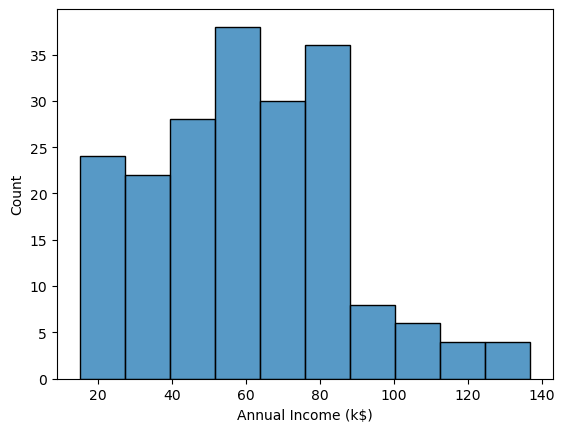

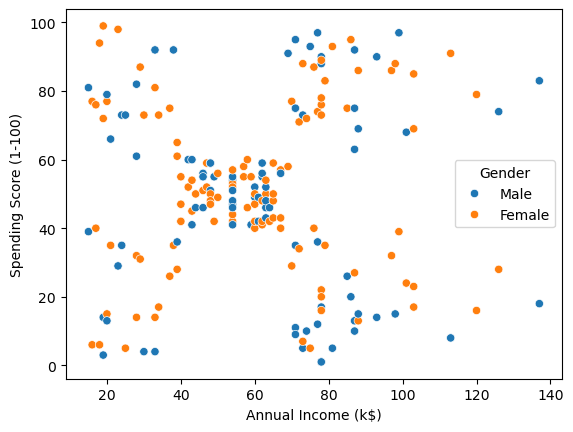

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
sns.histplot(df['Annual Income (k$)'])
plt.show()

# Gráfico de dispersión
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

In [8]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Llenar valores faltantes solo en columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [10]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

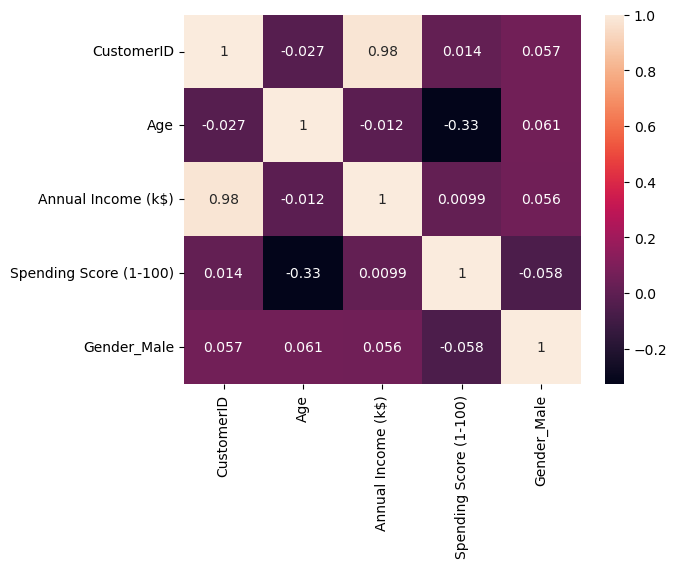

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [14]:
from sklearn.cluster import KMeans

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Selecciona las características
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['KMeans_Cluster'] = kmeans.labels_

In [16]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=5)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X)


In [18]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])
calinski_kmeans = calinski_harabasz_score(X, df['KMeans_Cluster'])

silhouette_hierarchical = silhouette_score(X, df['Hierarchical_Cluster'])
calinski_hierarchical = calinski_harabasz_score(X, df['Hierarchical_Cluster'])

print(f'Silhouette K-Means: {silhouette_kmeans}, Calinski K-Means: {calinski_kmeans}')
print(f'Silhouette Hierarchical: {silhouette_hierarchical}, Calinski Hierarchical: {calinski_hierarchical}')


Silhouette K-Means: 0.553931997444648, Calinski K-Means: 247.35899338037288
Silhouette Hierarchical: 0.5529945955148897, Calinski Hierarchical: 243.07142892964563


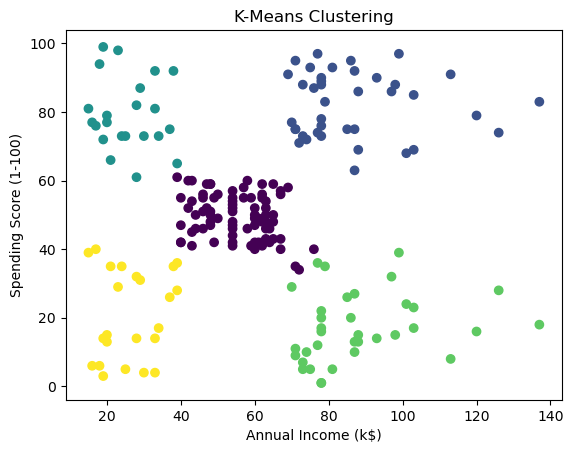

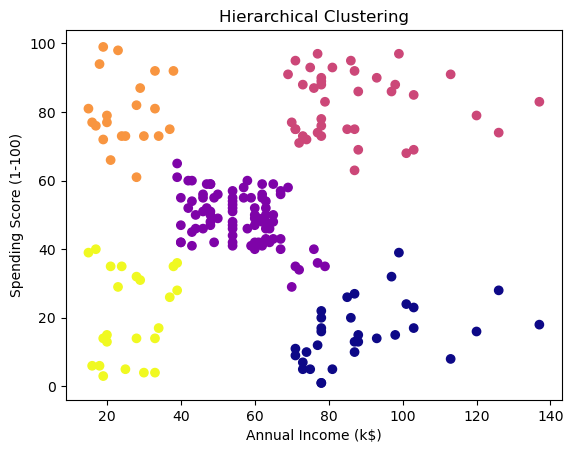

In [20]:
# K-Means
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Hierarchical Clustering
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Hierarchical_Cluster'], cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
